In [1]:
from __future__ import division
import os,sys
from numpy import *
from pandas import *
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-2
#     shuffle(numFeat)
    dataArr=[]
    lonArr=[]
    latArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2]))
        latArr.append(float(curLine[-1]))
    return dataArr,lonArr,latArr

def loadDataShuffle(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-2
    shuffle(numFeat)
    dataArr=[]
    lonArr=[]
    latArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        lonArr.append(float(curLine[-2]))
        latArr.append(float(curLine[-1]))
    
    return dataArr,lonArr,latArr

In [52]:
#标准回归训练
def standRegres(xArr,yArr):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    xTx=xMat.T*xMat
    if linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [53]:
dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')

In [6]:
#计算误差
def absError(yArr,yHatArr):
    return abs(yArr-yHatArr).sum()/len(yArr)

In [12]:
#预测台风经度
# print dataArr,lonArr#
wsLon=standRegres(dataArr,lonArr)
wsLon

matrix([[ -5.22117507e+01],
        [ -2.41559628e+01],
        [ -2.20391170e+00],
        [  1.54024183e+00],
        [  2.86360775e+01],
        [ -2.04151547e-01],
        [  1.72036633e+01],
        [ -2.53525473e+00],
        [ -5.78965209e-01],
        [  2.46324053e+03],
        [ -2.68751857e+02],
        [  2.09402377e-03],
        [ -2.46306574e+03],
        [  2.37824028e+01],
        [  1.10008615e-01],
        [ -1.99004552e-01],
        [ -1.92329344e-02]])

In [11]:
#预测台风纬度
wsLat=standRegres(dataArr,latArr)
wsLat

matrix([[ -4.85017424e+00],
        [ -2.78274387e+01],
        [  6.54714037e+00],
        [ -1.29482250e+01],
        [  2.89541891e+01],
        [  6.44887627e+00],
        [ -1.12761247e+00],
        [ -9.14706751e-01],
        [ -1.83840359e-01],
        [  2.55659584e+03],
        [ -2.78578528e+02],
        [ -3.90012434e-04],
        [ -2.55425100e+03],
        [  2.91181103e+01],
        [ -1.58895030e+00],
        [  1.03093603e-01],
        [  1.60601813e-02]])

In [14]:
xMat=mat(dataArr)

In [49]:
lonHatArr=xMat*wsLon
latHatArr=xMat*wsLat

# fig=plt.figure()
# ax=fig.add_subplot(111)
# ax.scatter(xMat[:,1].flatten().A[0],lonHatArr.T[:,0].flatten().A[0])

NameError: name 'yArr' is not defined

In [28]:
#计算误差平方和
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [25]:
print rssError(array(xMat),array(lonHatArr))

62623121.9136


In [26]:
print sqrt(rssError(array(xMat),array(lonHatArr)))/100

79.1347723277


In [64]:
#shuffle 随机化
 
# data=data.as_matrix()
# shuffle(data)
# p=0.8
# train=data[;int(len(data)*p),:]
# test=data[int(len(data)*p):,:]

# print len(train),len(test)

def DataSort(filename,p=0.8):
#     p为测试集的比例,filename为保存数据的文件名字
    dataArr,lonArr,latArr=loadDataSet(filename)
#     p=0.8
    trainX=dataArr[0:int(len(dataArr)*p)-1]
    lonTrainY=lonArr[0:int(len(lonArr)*p)-1]
    latTrainY=latArr[0:int(len(latArr)*p)-1]
    testX=dataArr[int(len(dataArr)*p):]
    lonTestY=lonArr[int(len(lonArr)*p):]
    latTestY=latArr[int(len(latArr)*p):]
#     print int(len(dataArr)*p),int(len(lonArr)*p),int(len(latArr)*p)
    return trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY

In [21]:
#经度误差
absErrorLon=absError(lonArr,lonHatArr.T)
print absErrorLon
#纬度误差
absErrorLat=absError(latArr,latHatArr.T)
print absErrorLat

9.29602384744
4.7429854076


In [22]:
corrcoef(lonHatArr.T,lonArr)

array([[ 1.       ,  0.9545544],
       [ 0.9545544,  1.       ]])

In [23]:
corrcoef(latHatArr.T,latArr)

array([[ 1.        ,  0.91666963],
       [ 0.91666963,  1.        ]])

In [24]:
110*sqrt(absErrorLon**2+absErrorLat**2)

1147.9698760778765

1.15470562835
0.862023508569
158.508038823


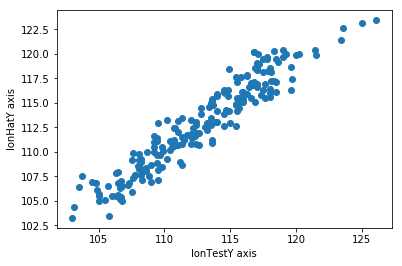

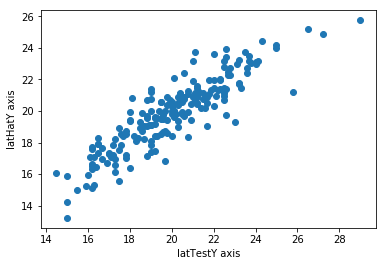

In [42]:
#调用Sklearn的线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

# trainX,lonTrainY,latTrainY,testX,lonTestY,latTestY=DataSort('data/typhoon.dat',0.6)


clf=linear_model.LinearRegression()

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

In [26]:
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

1.15470562835
0.862023508569
158.508038823


In [27]:
#局部加权线性回归训练
def lwlr(testPoint,xArr,yArr,k=1.0):#局部加权线性回归训练
    xMat=mat(xArr)
    yMat=mat(yArr).T
    m=shape(xMat)[0]
    weights=mat(eye((m)))
    for j in range(m):
        diffMat=testPoint-xMat[j,:]
        weights[j,j]=exp(diffMat*diffMat.T/(-2.0*k**2))#权重值大小以指数级衰减，
        #k控制速度
    xTx=xMat.T*(weights*xMat)
    if linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*(weights*yMat))#得到回归系数ws的一个估计
    return testPoint*ws

def lwlrTest(testArr,xArr,yArr,k=1.0):#为数据集中每个点调用lwlr(),有助于求解k的大小
    m=shape(testArr)[0]
    yHat=zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat

def lwlrTestPlot(xArr,yArr,k=1.0):
    yHat=zeros(shape(yArr))
    xCopy=mat(xArr)
    xCopy.sort(0)
    for i in range(shape(xArr)[0]):
        yHat[i]=lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [28]:
#岭回归
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    xTx=xMat.T*xMat
    denom=xTx+eye(shape(xMat)[1])*lam
    if linalg.det(denom)==0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws=denom.I*(xMat.T*yMat.T)
    return ws

def ridgeTest(xArr,yArr):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
###
    xMeans=mean(xMat,0)
    xVar=var(xMat,0)
    xMat=(xMat-xMeans)/xVar
    numTestPts=30
    wMat=zeros((numTestPts,shape(xMat)[1]))
#     for i in range(numTestPts):
#         ws=ridgeRegres(xMat,yMat,exp(i-10)
#         wMat[i,:]=ws.T
    for i in range(numTestPts):
        ws=ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat

In [29]:
#前向逐步回归
def stageWise(xArr,yArr,eps=0.01,numlt=100):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
    xMat=regularize(xMat)
    m,n=shape(xMat)
    returnMat=zeros((numlt,n))
    ws=zeros((n,1))
    wsTest=ws.copy()
    wsMax=ws.copy()
    for i in range(numlt):
        #print ws.T
        lowestError=inf;
        for j in range(n):
            for sign in [-1,1]:
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xMat*wsTest
                rssE=rssError(yMat.A,yTest.A)
                if rssE<lowestError:
                    lowestError=rssE
                    wsMax=wsTest
        ws=wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [30]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

1.14446149628
0.873174215789
158.347486446


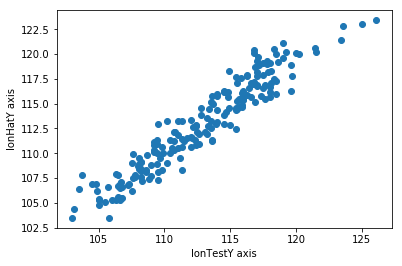

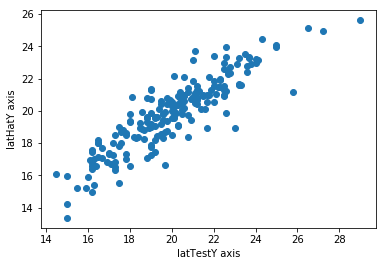

In [40]:
#调用Sklearn的岭回归算法
dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

clf=linear_model.Ridge(alpha=0.5)
clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)
#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.17686223428
0.912718857663
163.824696619


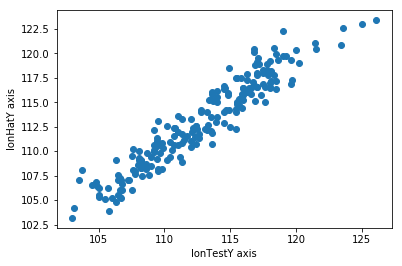

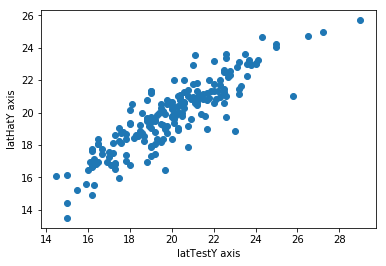

In [39]:
#调用Sklearn的Lasso线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

clf=linear_model.Lasso(alpha=0.1)

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)
#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

1.1907830249
0.955334681947
167.930359553


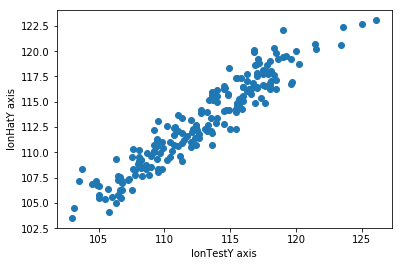

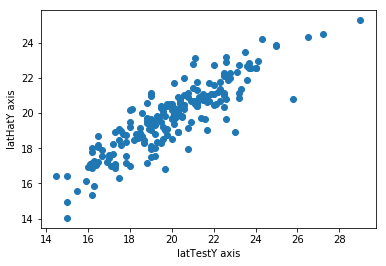

In [38]:
#调用Sklearn的ElasticNet线性回归算法
from sklearn import linear_model

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

clf=linear_model.ElasticNet(alpha=1.0)

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

4.33560437091e+13
3.50413347272e+13
6.13208481296e+15


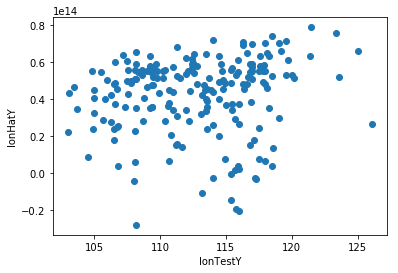

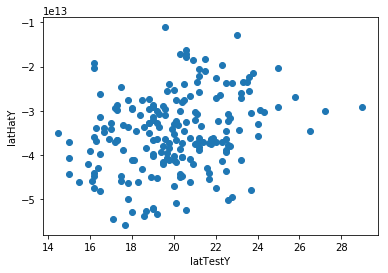

In [48]:
#调用Sklearn的SGDRegressor回归算法
from sklearn import linear_model
import numpy as np

dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')
trainX=dataArr[0:299]
lonTrainY=lonArr[0:299]
latTrainY=latArr[0:299]
testX=dataArr[300:]
lonTestY=lonArr[300:]
latTestY=latArr[300:]

clf=linear_model.SGDRegressor()

clf.fit(trainX,lonTrainY)
lonHatY=clf.predict(testX)

clf.fit(trainX,latTrainY)
latHatY=clf.predict(testX)
absErrorlon=absError(lonTestY,lonHatY)
absErrorlat=absError(latTestY,latHatY)

print absErrorlon
print absErrorlat
print 110*sqrt(absErrorlon**2+absErrorlat**2)

#画出真实值与预测值的相关分布
plot_coe(lonTestY,lonHatY,latTestY,latHatY)

In [79]:
#局部加权线性回归训练
def lwlr(testPoint,xArr,yArr,k=1.0):#局部加权线性回归训练
    xMat=mat(xArr)
    yMat=mat(yArr).T
    m=shape(xMat)[0]
    weights=mat(eye((m)))
    for j in range(m):
        diffMat=testPoint-xMat[j,:]
        weights[j,j]=exp(diffMat*diffMat.T/(-2.0*k**2))#权重值大小以指数级衰减，
        #k控制速度
    xTx=xMat.T*(weights*xMat)
    if linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*(weights*yMat))#得到回归系数ws的一个估计
    return testPoint*ws

def lwlrTest(testArr,xArr,yArr,k=1.0):#为数据集中每个点调用lwlr(),有助于求解k的大小
    m=shape(testArr)[0]
    yHat=zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat

def lwlrTestPlot(xArr,yArr,k=1.0):
    yHat=zeros(shape(yArr))
    xCopy=mat(xArr)
    xCopy.sort(0)
    for i in range(shape(xArr)[0]):
        yHat[i]=lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [80]:
dataArr,lonArr,latArr=loadDataSet('data/typhoon.dat')


[1.0, 122.0, -13.047, -14.85, 125.4, -16.624, -1.5, 122.7, 124.5, 18.7, 5.5, 92.641, 18.1, -3.4, 18.6, 17.4, 60.0]


In [47]:
def plot_coe(lonTestY,lonHatY,latTestY,latHatY):
    fig1=plt.figure('fig1')
    ax1=fig1.add_subplot(111)
    ax1.scatter(lonTestY,lonHatY)
    plt.xlabel('lonTestY')
    plt.ylabel('lonHatY')
    fig2=plt.figure('fig2')
    ax2=fig2.add_subplot(111)
    ax2.scatter(latTestY,latHatY)
    plt.xlabel('latTestY')
    plt.ylabel('latHatY')